<a href="https://colab.research.google.com/github/BrunoAndrade1/data-science-pandas/blob/main/FIFA_2018_Bruno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FIFA 2018 Clustering


\\\Source: https://www.kaggle.com/karangadiya/fifa19


\\\https://www.kaggle.com/datasets/thec03u5/fifa-18-demo-player-dataset

https://www.kaggle.com/code/ekrembayar/fifa-data-analysis-visualization

In [1]:
# # teste do google drive
# from google.colab import drive
# drive.mount('/content/gdrive')

In [2]:
# data manipulation
import pandas as pd
import numpy as np
#from data_visualization  import *
#from funcoes_python.data_manipulation import *

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#from data_visualization import *
#from functions.data_visualization import *
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer


# clustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


# metrics and model selection
from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.metrics import (confusion_matrix, 
                             classification_report,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             auc,
                             roc_auc_score,
                             silhouette_score
                            )
                             

# set some options in pandas
pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

# warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def check_duplicate_lines(data_frame):
    if data_frame.shape[0]!=data_frame.drop_duplicates().shape[0]:
        duplicate_lines = dfata_frame.shape[0]-data_frame.drop_duplicates().shape[0]
        return f'{duplicated_lines} duplicate lines'
    return '0 duplicate lines'



def check_missing(df):
    """
    Returna uma Series com o percentual de missing data em cada coluna. 
    """
    import pandas
    if isinstance(df, pandas.core.frame.DataFrame):
        missing = (((df.isnull().sum()/df.shape[0])*100).round(2)).sort_values(ascending = False)
        return missing
    return -1


def show_percentage_missing(df):
    import matplotlib.pyplot as plt
    
    "Mostra o percentual de missing em cada coluna graficamente."
    missing = check_missing(df)
    plt.figure(figsize = (10, 15))
    plt.barh(y = missing.index, width = missing.values, color = 'darkgray', height = 0.7, align = 'edge')
    plt.xlabel('% of missing values', size = 10)
    plt.ylabel('Columns', size = 10)
    plt.title('Missing Values', fontdict = {'color':'gray', 'weight':'bold', 'size': 12})
    plt.grid(alpha = 0.5)
    plt.show()
    
    
    

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def feature_plot(feature, data):
    # adjusts subplots and plot size
    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    fig.suptitle(f'Univariate analysis for {feature}')
    # insert histogram in axis 0
    sns.histplot(data[feature], kde = True, ax = ax[0])
    ax[0].set_xlabel('Distribution of '+feature)
    # insert boxplot in axis 1
    sns.boxplot(y = data[feature], ax = ax[1])
    # insert violinplot in axis 2
    sns.violinplot(x = data[feature], ax = ax[2])
    # adjust spacing between subplots
    fig.tight_layout(pad = 3)


def univariate_analysis(features: list, data = pd.DataFrame):
    for feature in features:
        feature_plot(feature, data)
        

    

In [5]:
df = pd.read_csv('/content/drive/MyDrive/funcoes_python/data.csv').drop(columns = ['Unnamed: 0'])

In [6]:
# outra forma de mostrar o dtype de cada coluna e o head do df com gerenciador de contexto
# gerenciador de contexto utilizado em banco de dados 
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
     display(df.head(3))
     display(df.dtypes)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


ID                            int64
Name                         object
Age                           int64
Photo                        object
Nationality                  object
Flag                         object
Overall                       int64
Potential                     int64
Club                         object
Club Logo                    object
Value                        object
Wage                         object
Special                       int64
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Body Type                    object
Real Face                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
LS                          

In [7]:
# quantidade de linhas e a colunas
df.shape

(18207, 88)

In [8]:
# informações genéricas do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [9]:
# quantidade de valores únicos por cada coluna
df.nunique()

ID                          18207
Name                        17194
Age                            29
Photo                       18207
Nationality                   164
Flag                          164
Overall                        48
Potential                      47
Club                          651
Club Logo                     679
Value                         217
Wage                          144
Special                      1422
Preferred Foot                  2
International Reputation        5
Weak Foot                       5
Skill Moves                     5
Work Rate                       9
Body Type                      10
Real Face                       2
Position                       27
Jersey Number                  99
Joined                       1736
Loaned From                   341
Contract Valid Until           36
Height                         21
Weight                         57
LS                             93
ST                             93
RS            

In [10]:
# verifica o percentual de missing data
check_missing(df)

Loaned From                 93.06
LDM                         11.45
LCM                         11.45
RS                          11.45
LW                          11.45
LF                          11.45
CF                          11.45
RF                          11.45
RW                          11.45
LAM                         11.45
CAM                         11.45
RAM                         11.45
LM                          11.45
CM                          11.45
LS                          11.45
RCM                         11.45
RM                          11.45
LWB                         11.45
CDM                         11.45
RDM                         11.45
RWB                         11.45
LB                          11.45
LCB                         11.45
CB                          11.45
RCB                         11.45
RB                          11.45
ST                          11.45
Release Clause               8.59
Joined                       8.53
Contract Valid

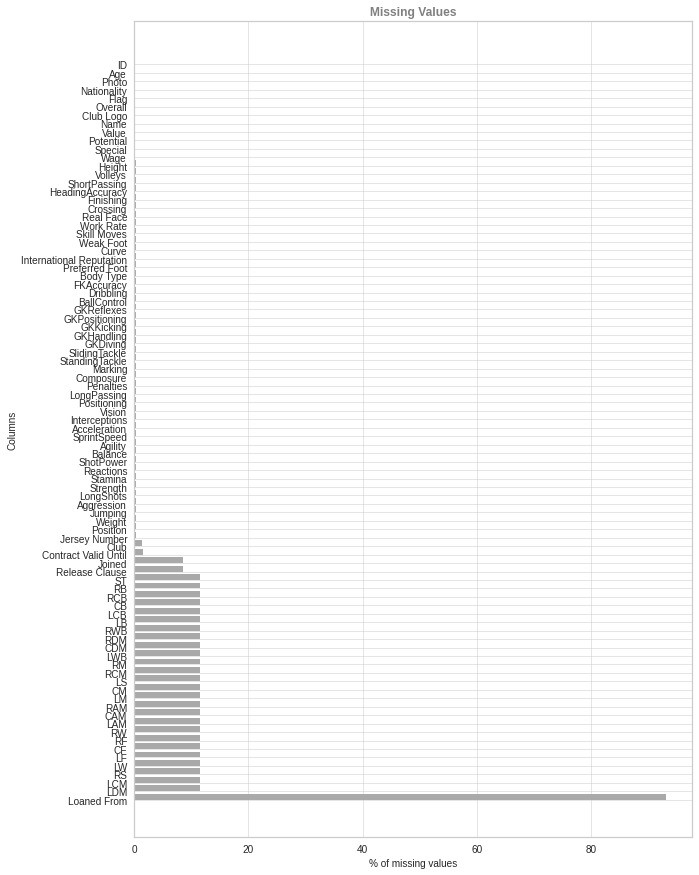

In [11]:
# plot percentual de missing por coluna
show_percentage_missing(df)

In [ ]:
# checa linhas duplicadas
check_duplicate_lines(df)

'0 duplicate lines'

In [ ]:
# checa linhas duplicadas
check_duplicate_lines(df)

'0 duplicate lines'

## Data Cleaning

Nesta etapa iremos limpar algumas colunas do dataset, focaremos nas colunas que serão utilizadas no clustering, ou naquelas que possuem maior relevância para a compreensão dos resultados.

In [ ]:
df.Wage.head()

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

In [ ]:
df.Value.head()

0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object

In [ ]:
df.Value.apply(lambda x:x[0]).value_counts()

€    18207
Name: Value, dtype: int64

In [ ]:
df.Wage.apply(lambda x:x[0]).value_counts()

€    18207
Name: Wage, dtype: int64

In [ ]:
df.Value.apply(lambda x: x[-1]).value_counts()

K    11108
M     6847
0      252
Name: Value, dtype: int64

In [ ]:
df.Wage.apply(lambda x:x[-1]).value_counts()

K    17966
0      241
Name: Wage, dtype: int64

limpar os campos: deixar padronizado os valores $

Fazendo a limpeza da coluna Value

In [12]:
# substitui '€' por ''
df.Value = df.Value.str.replace('€', '')
# cria máscaras para remover 'M' e 'K'
M_mask = df.Value.apply(lambda x: x[-1] == 'M')
K_mask = df.Value.apply(lambda x: x[-1] == 'K')
zero_mask = df.Value.apply(lambda x: x[-1] == '0')
# remove 'M' e 'K' e transforma os valores em float
df.loc[M_mask, 'Value'] = df.loc[M_mask, 'Value'].apply(lambda x: np.float(x[:-1])*1e6)
df.loc[K_mask, 'Value'] = df.loc[K_mask, 'Value'].apply(lambda x: np.float(x[:-1])*1e3)
df.Value = df.Value.astype(float)

fazendo a limpeza da coluna Wage


In [13]:
# dubistitui € por ''
df.Wage = df.Wage.str.replace('€','')
# cira máscara para remover '' e ' 'k'
K_mask = df.Wage.apply(lambda x:x[-1] == "K")
# pegando as linhas de K_mask = k na coluna de Wage e convertendo para 10^3 
df.loc[K_mask,'Wage'] = df.loc[K_mask,'Wage'].apply(lambda x: np.float(x[:-1])*1e3)
# convertendo para float
df.Wage = df.Wage.astype(float)


Faz processo similar para a coluna Release Clause:

In [14]:
df['Release Clause'] = df['Release Clause'].astype(str).apply(lambda x: x[1:])
M_mask = df['Release Clause'].apply(lambda x: x[-1] == 'M')
K_mask = df['Release Clause'].apply(lambda x: x[-1] == 'K')
df.loc[K_mask, 'Release Clause'] = pd.to_numeric(df.loc[K_mask, 'Release Clause'].str.replace('K', 'e3'))
df.loc[M_mask, 'Release Clause'] = pd.to_numeric(df.loc[M_mask, 'Release Clause'].str.replace('M', 'e6'))

In [15]:
# verifica o dtype das colunas após a transformação
df[['Wage', 'Value']].dtypes

Wage     float64
Value    float64
dtype: object

In [16]:
# drop dos jogadores com Value 0
# confirmar se faz sentido drop para esses jogadores 
condition = df.loc[df.Value == 0].index
df.drop(condition, axis = 0, inplace = True)


In [17]:
# set de valores incosistentes da coluna Body Type
df.loc[:2, 'Body Type'] = 'Normal'

In [18]:
# drop de algumas colunas que não serão utilizadas na análise
cols_to_drop = ['ID', 'Photo', 'Flag', 'Club Logo']
df.drop(columns = cols_to_drop, inplace = True)

Agora criemos o subset das colunas que serão utilizadas no processo de clustering.

In [19]:
# cria uma cópia do dataset original
data = df.copy()

In [20]:
# lista de colunas para serem utilziadas no clustering
cols_to_cluster = data.columns.to_list()[49:-1]
data = data[cols_to_cluster]

In [ ]:
# verifica o percentual de missing data do subset criado para o clustering
check_missing(data)

Crossing           0.27
Composure          0.27
LongShots          0.27
Aggression         0.27
Interceptions      0.27
Positioning        0.27
Vision             0.27
Penalties          0.27
Marking            0.27
Finishing          0.27
StandingTackle     0.27
SlidingTackle      0.27
GKDiving           0.27
GKHandling         0.27
GKKicking          0.27
GKPositioning      0.27
Strength           0.27
Stamina            0.27
Jumping            0.27
ShotPower          0.27
Balance            0.27
Reactions          0.27
Agility            0.27
SprintSpeed        0.27
Acceleration       0.27
BallControl        0.27
LongPassing        0.27
FKAccuracy         0.27
Curve              0.27
Dribbling          0.27
Volleys            0.27
ShortPassing       0.27
HeadingAccuracy    0.27
GKReflexes         0.27
dtype: float64

Faremos uma imputação de missing pela mediana.

Pode usar outros substitutos mais robusto e/ou excluir o missing.


In [21]:
for col in data:
    median = data[col].median()
    data[col] = data[col].fillna(median)

In [22]:
# missing check após a imputação
check_missing(data)

Crossing           0.0
Composure          0.0
LongShots          0.0
Aggression         0.0
Interceptions      0.0
Positioning        0.0
Vision             0.0
Penalties          0.0
Marking            0.0
Finishing          0.0
StandingTackle     0.0
SlidingTackle      0.0
GKDiving           0.0
GKHandling         0.0
GKKicking          0.0
GKPositioning      0.0
Strength           0.0
Stamina            0.0
Jumping            0.0
ShotPower          0.0
Balance            0.0
Reactions          0.0
Agility            0.0
SprintSpeed        0.0
Acceleration       0.0
BallControl        0.0
LongPassing        0.0
FKAccuracy         0.0
Curve              0.0
Dribbling          0.0
Volleys            0.0
ShortPassing       0.0
HeadingAccuracy    0.0
GKReflexes         0.0
dtype: float64

In [23]:
# estatísticas descritivas dos dados 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Crossing,17955.0,49.763241,18.328210,5.0,38.0,54.0,64.0,93.0
Finishing,17955.0,45.595823,19.486201,2.0,30.0,49.0,62.0,95.0
HeadingAccuracy,17955.0,52.308772,17.339429,4.0,45.0,56.0,64.0,94.0
ShortPassing,17955.0,58.726037,14.655073,7.0,54.0,62.0,68.0,93.0
Volleys,17955.0,42.938346,17.661861,4.0,30.0,44.0,57.0,90.0
Dribbling,17955.0,55.435199,18.876019,4.0,49.0,61.0,68.0,97.0
Curve,17955.0,47.223392,18.360243,6.0,34.0,49.0,62.0,94.0
FKAccuracy,17955.0,42.877249,17.454486,3.0,31.0,41.0,56.0,94.0
LongPassing,17955.0,52.735617,15.285614,9.0,43.0,56.0,64.0,93.0
BallControl,17955.0,58.428126,16.641045,5.0,54.0,63.0,69.0,96.0


## EDA and Data Visualization

### Analysis of the data

Players by nationality.<br />
Nacionalidade dos jogadores

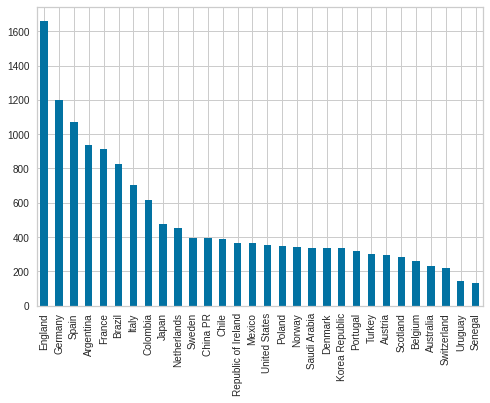

In [ ]:
df.Nationality.value_counts()[:30].plot(kind = 'bar');

In [ ]:
data.columns

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'cluster'],
      dtype='object')

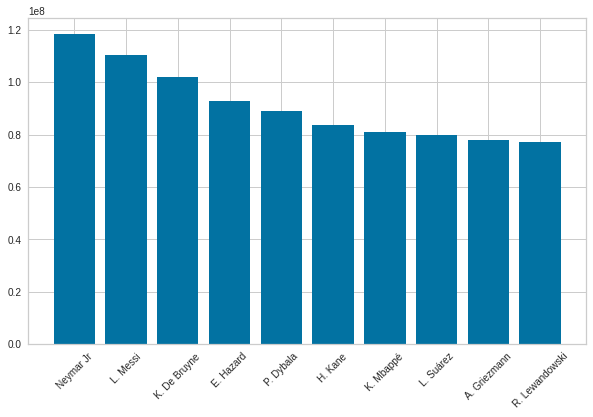

In [ ]:
jogadores = df.Value.sort_values(ascending = False).index.to_list()[:10]
plt.figure(figsize = (10, 6))
plt.bar(x = df.iloc[jogadores, 0].values, height = df.Value.sort_values(ascending = False)[:10])
plt.xticks(rotation = 45);

Age distribution.<br />
Distribuição por idade


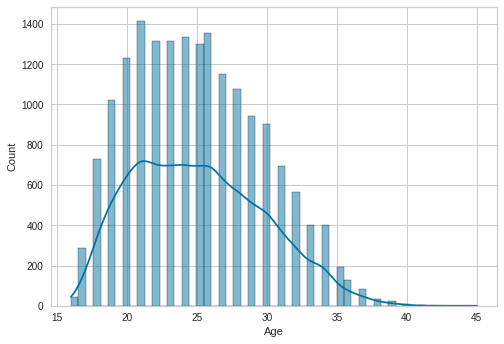

In [ ]:
sns.histplot(data = df['Age'],kde = True);

### Features of clustering

Usaremos a função univariate_analysis para obter um overview da distribuição das variáveis que serão utilizadas no clustering.

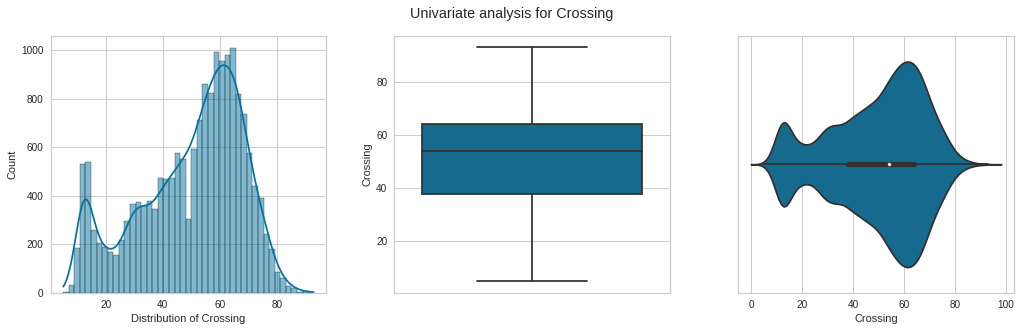

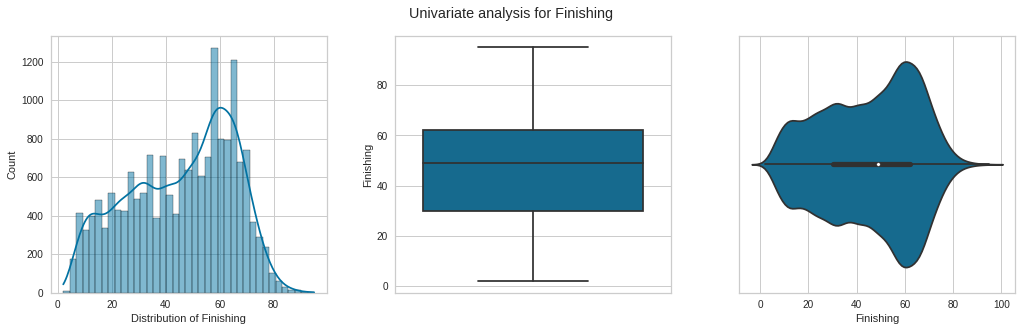

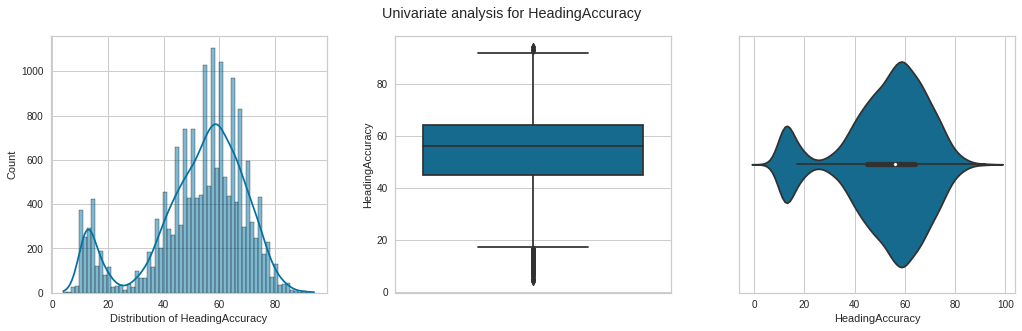

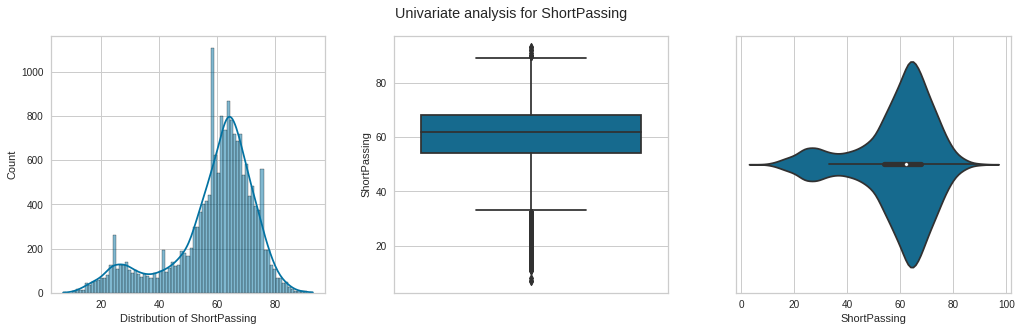

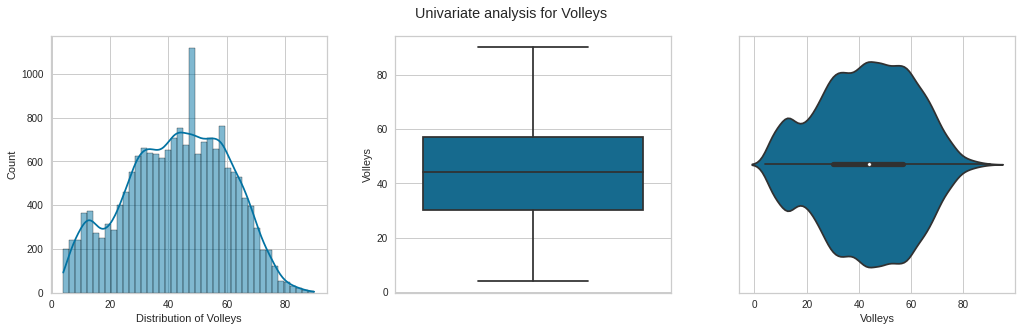

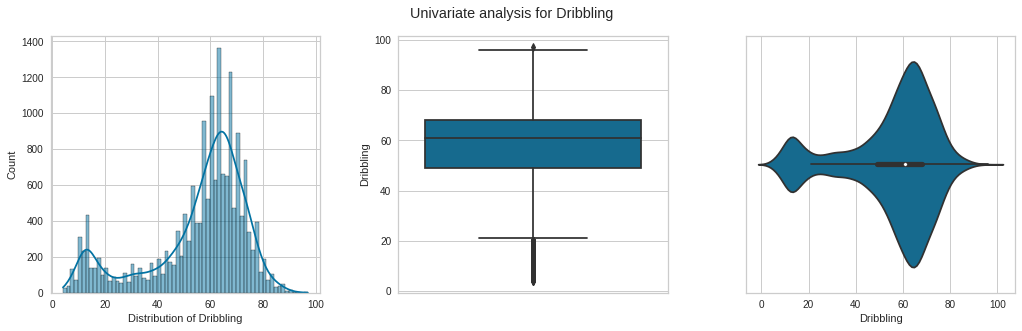

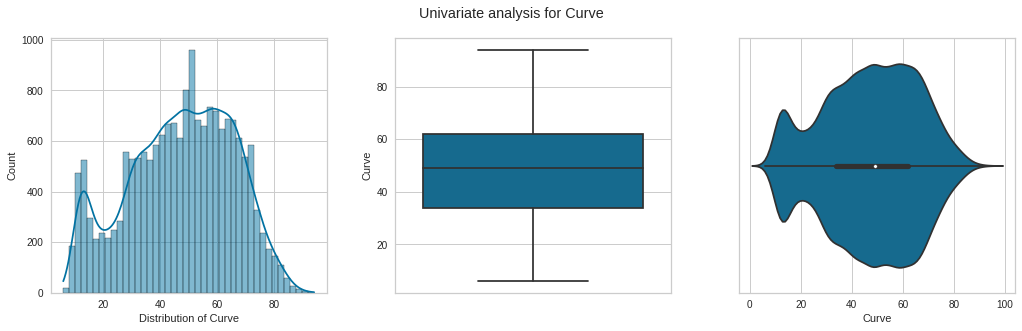

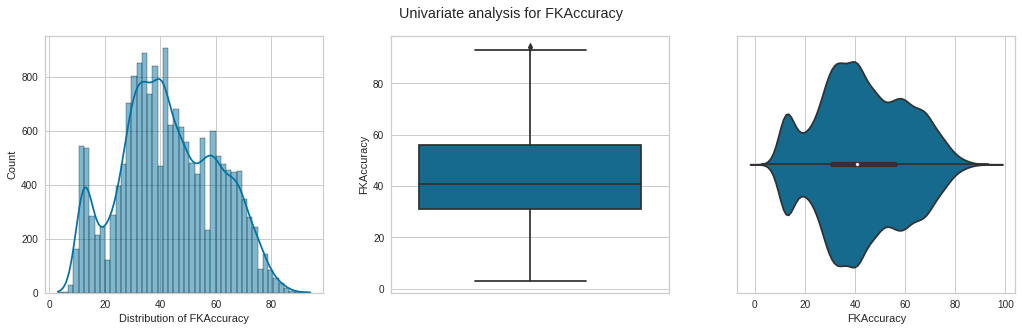

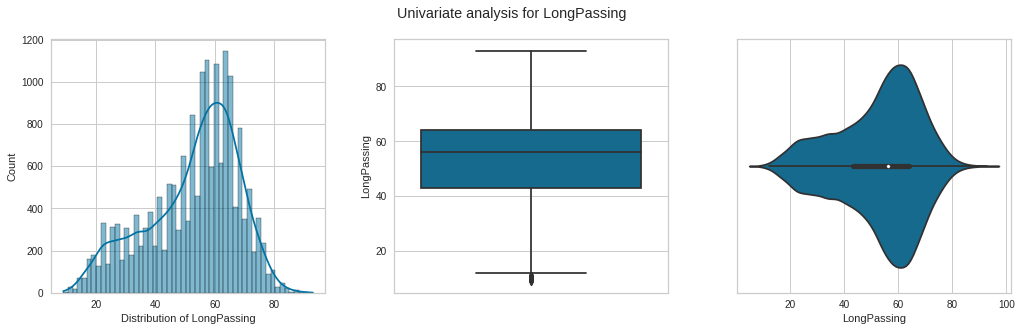

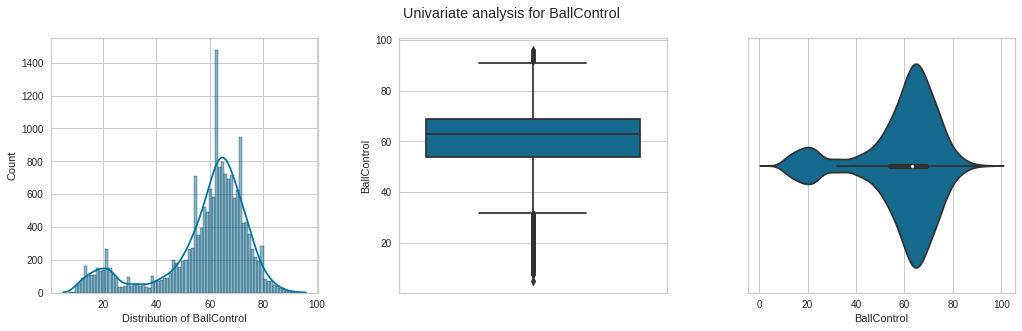

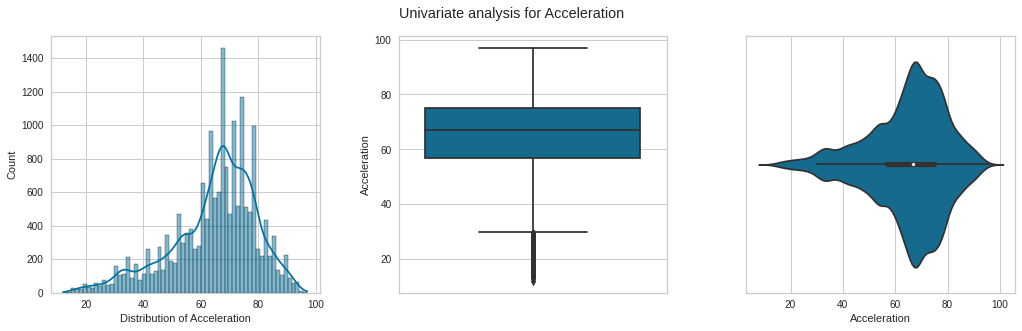

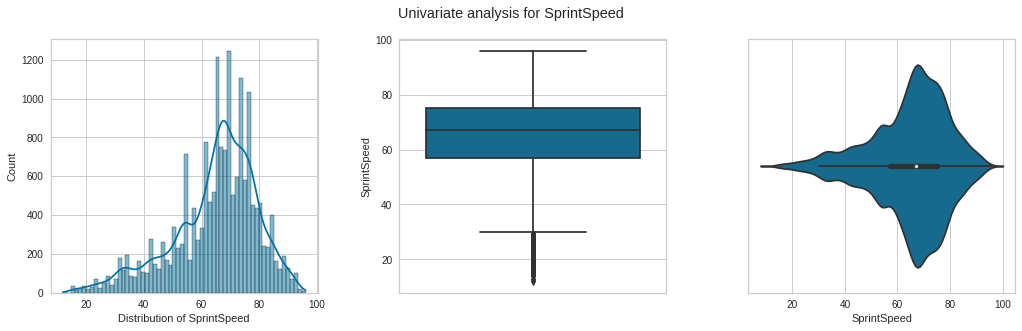

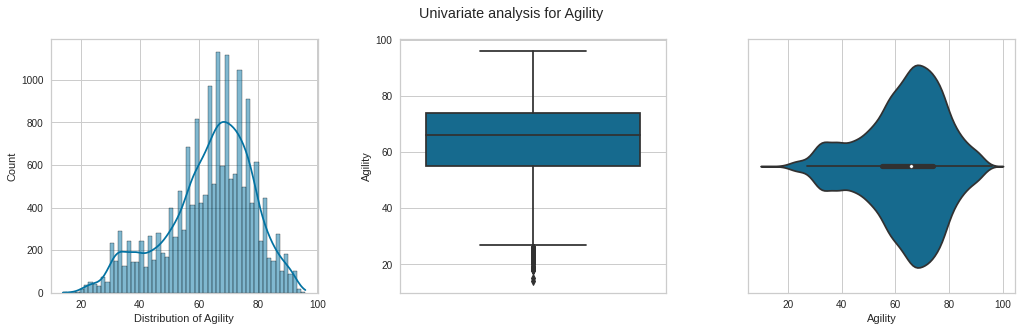

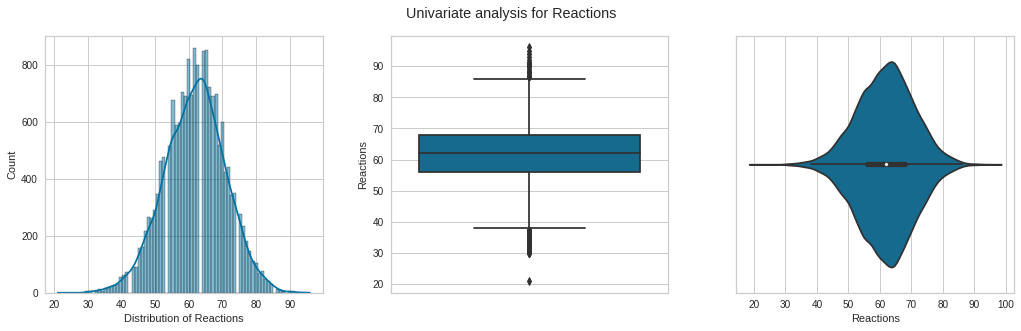

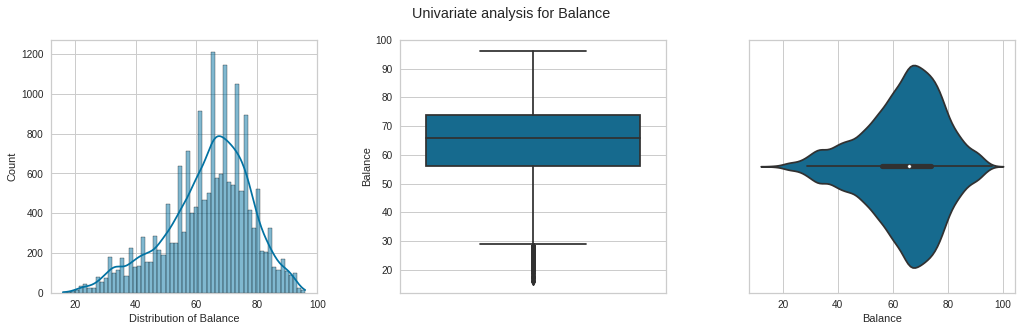

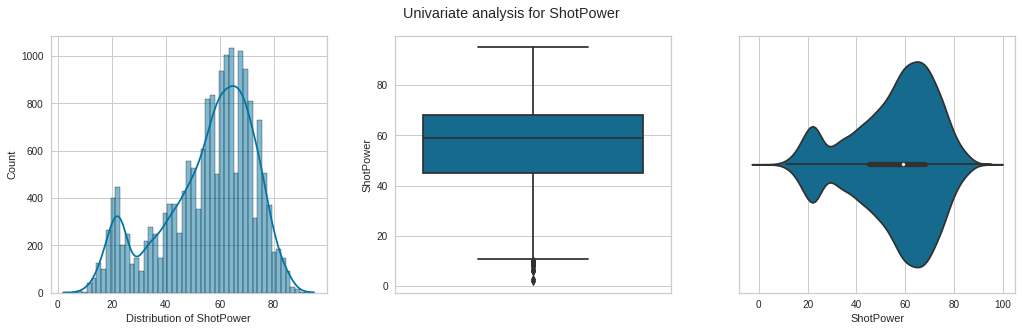

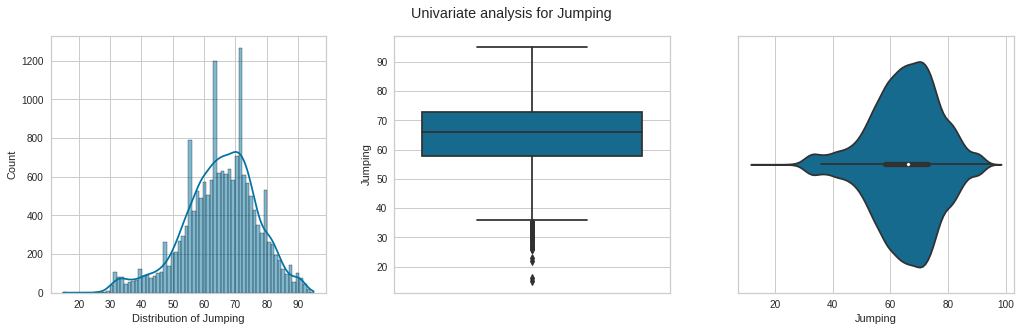

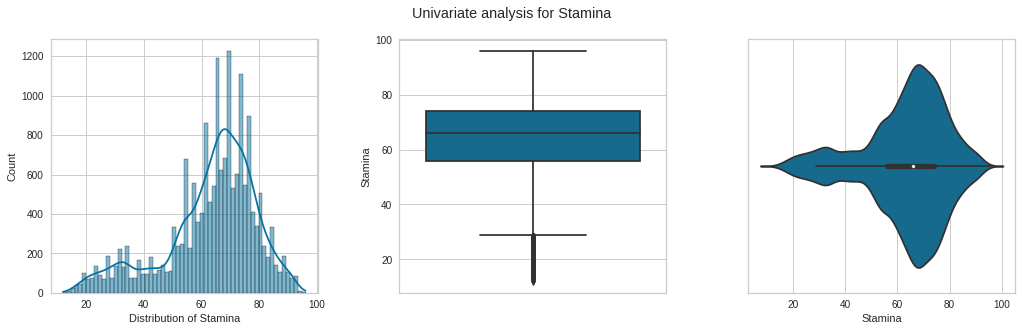

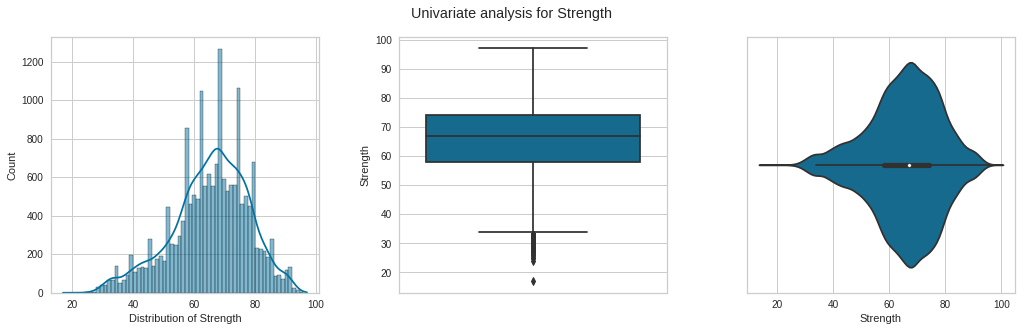

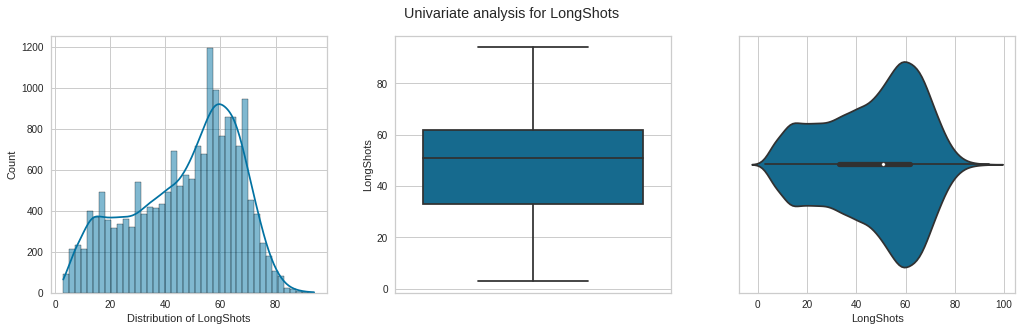

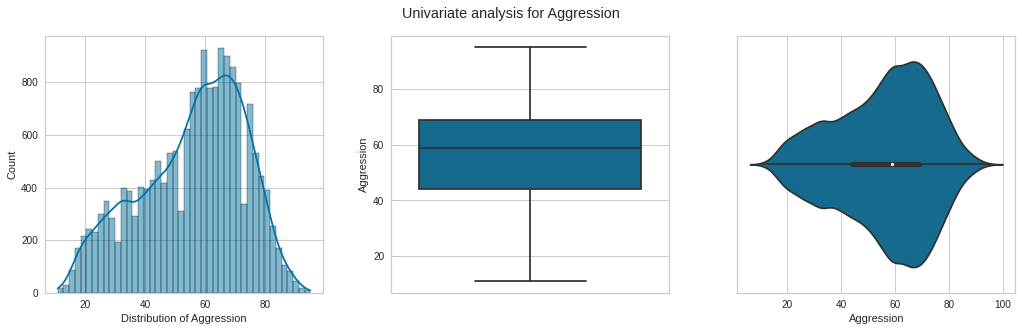

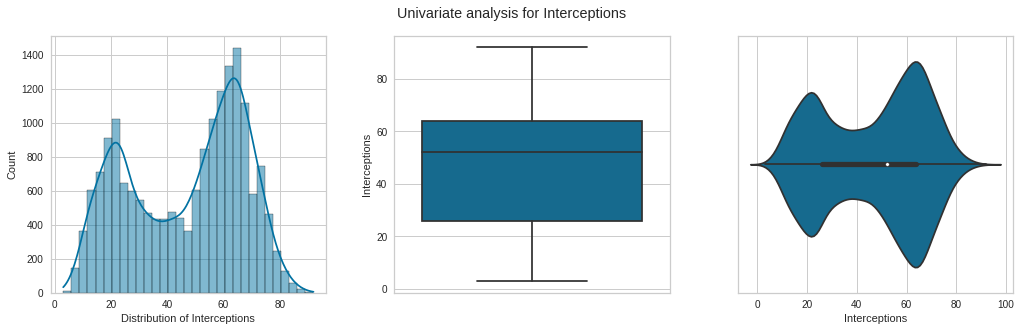

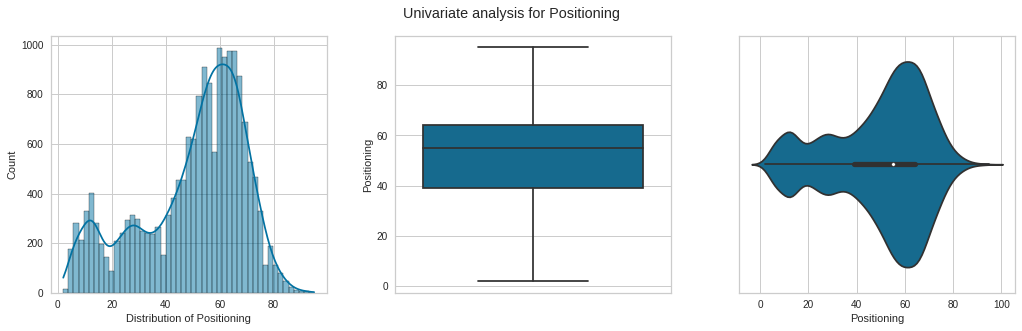

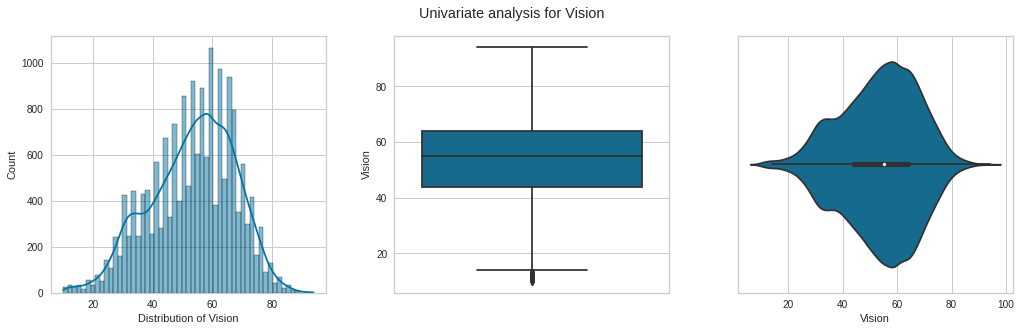

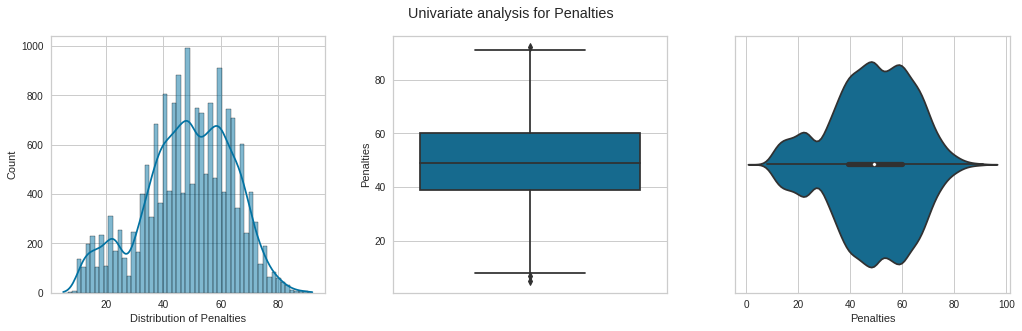

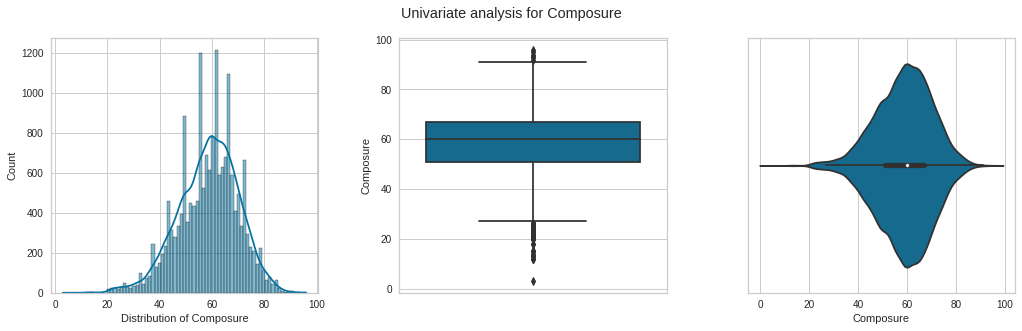

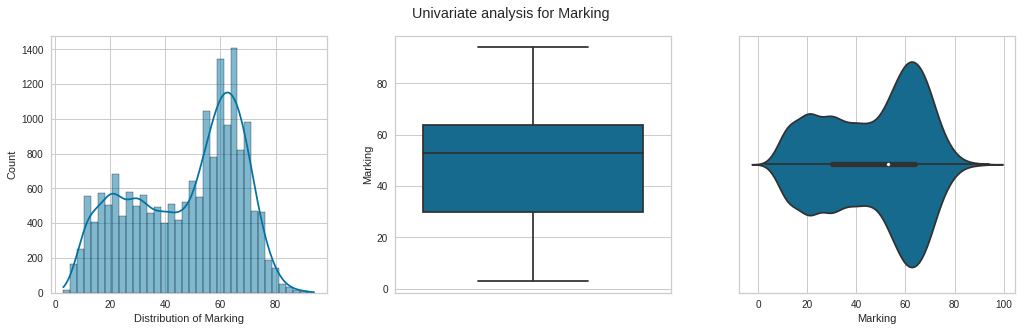

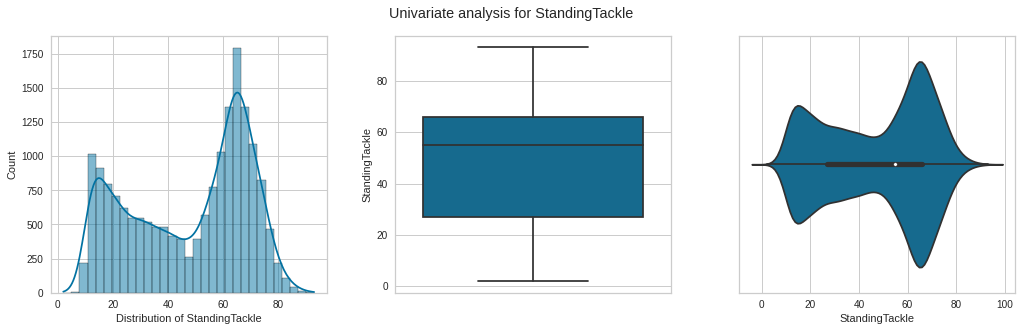

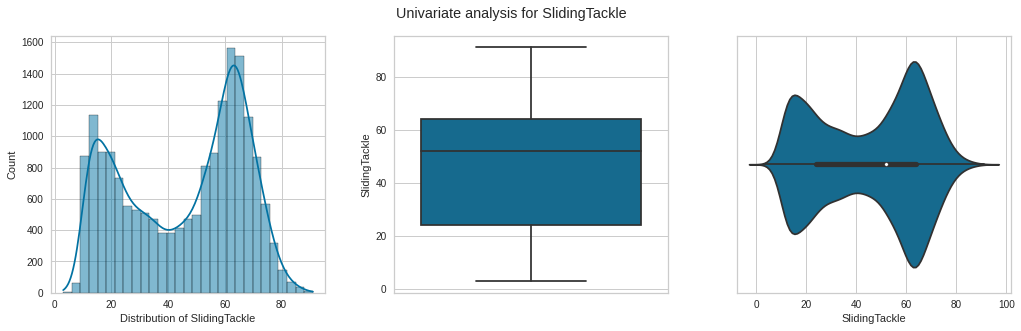

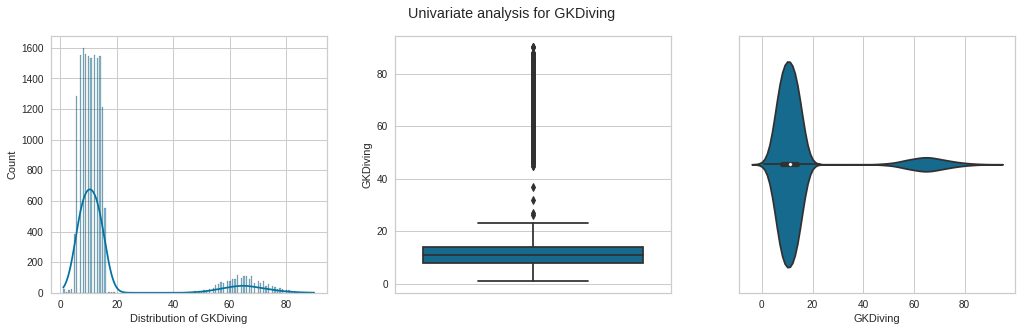

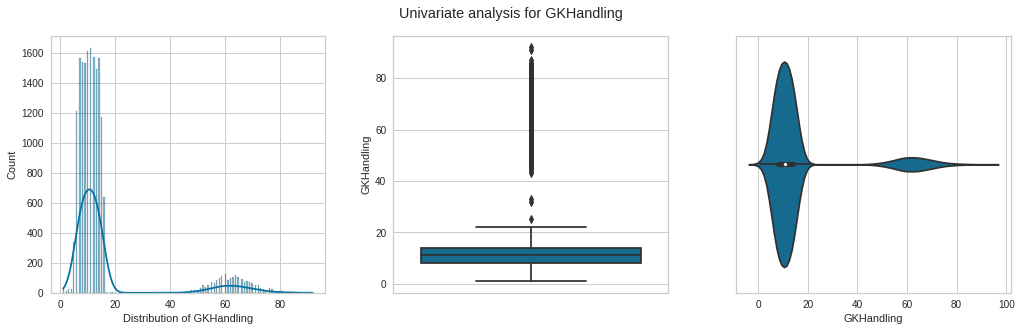

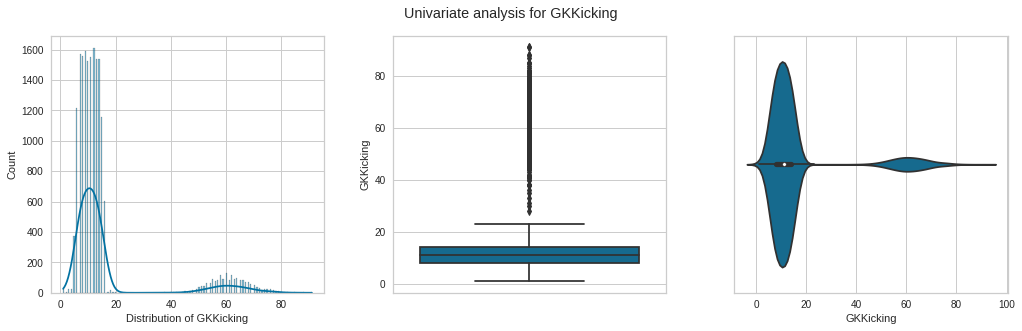

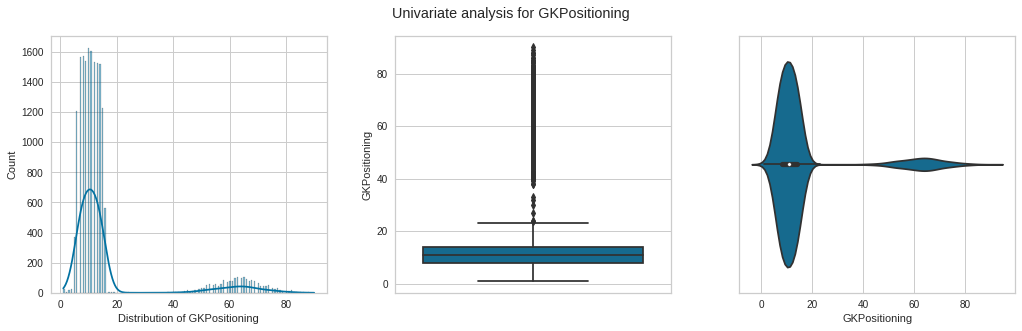

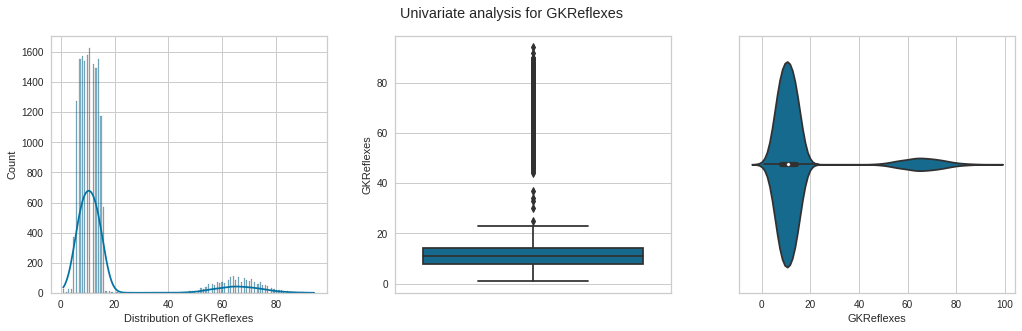

In [ ]:
univariate_analysis(features = cols_to_cluster, data = data)

## Clustering

Antes de aplicar o K-Means aos dados vamos aplicar o MinMaxScaler e armazenar em um novo DataFrame **X**.

In [24]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [25]:
# estatísticas descritivas após a transformação
X.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Crossing,17955.0,0.51,0.21,0.0,0.38,0.56,0.67,1.0
Finishing,17955.0,0.47,0.21,0.0,0.30,0.51,0.65,1.0
HeadingAccuracy,17955.0,0.54,0.19,0.0,0.46,0.58,0.67,1.0
ShortPassing,17955.0,0.60,0.17,0.0,0.55,0.64,0.71,1.0
Volleys,17955.0,0.45,0.21,0.0,0.30,0.47,0.62,1.0
Dribbling,17955.0,0.55,0.20,0.0,0.48,0.61,0.69,1.0
Curve,17955.0,0.47,0.21,0.0,0.32,0.49,0.64,1.0
FKAccuracy,17955.0,0.44,0.19,0.0,0.31,0.42,0.58,1.0
LongPassing,17955.0,0.52,0.18,0.0,0.40,0.56,0.65,1.0
BallControl,17955.0,0.59,0.18,0.0,0.54,0.64,0.70,1.0



precisa encontrar o número de cluesters para os dados, começando pelo metodo Elbow Method 

## Escolhendo o número de clusters para o K-Means

### Elbow  - Método do cotovelo

(https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9#:~:text=O%20M%C3%A9todo%20do%20Cotovelo&text=Como%20o%20KMeans%20calcula%20a,dist%C3%A2ncia%20seja%20a%20menor%20vi%C3%A1vel
)

WCSS é a soma da distância quadrada entre cada membro do cluster e seu centróide:
    
$$\text{WCSS} = \sum_{i=1}^{m}\left(x_i-c_i\right)^2$$


ara um claro exemplo de utilização do WCSS no KMeans e aplicação do método 


Elbow acesse [K-means Clustering Python Example](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203)

De modo geral, o objetivo será detectar onde é o ponto de inflexão da variância (o ponto a partir do qual conseguimos notar certo grau de estabilidade).


In [26]:
SEED = 99
wcss = list()
k_range = np.arange(1, 15)
n_jobs = -1,
# itera em um range de possíveis valores de K
# até a versão 0.23 do  sklearn  havia o argumento n_jobs. apos essa versão não e mais usado o argumento n_jobs
#
for k in k_range:
    # fit o KMeans com o respectivo número de K
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = SEED)
    kmeans = kmeans.fit(X)
    # append da inertia na lsita wcss
    wcss.append(kmeans.inertia_)

In [27]:
wcss_df = pd.DataFrame({'wcss': wcss, 'k': k_range})
wcss_df

,wcss,k
0,22302.068020,1
1,12100.759497,2
2,8977.018320,3
3,7221.990715,4
4,6570.948670,5
5,6115.877634,6
6,5824.349483,7
7,5585.224081,8
8,5378.852972,9
9,5209.973517,10


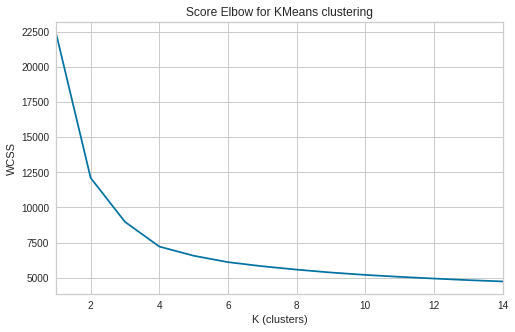

In [28]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(k_range, wcss)
ax.set(xlabel = 'K (clusters)', ylabel = 'WCSS', title = 'Score Elbow for KMeans clustering')
ax.set_xlim(k_range.min(), k_range.max());

Podemos fazer uma função para encapsular este código e escalar nossa aplicação. O k **é escolhido a partir do qual a curva se achata**, "onde o cotovelo está localizado".

Em nosso exemplo, $ K = 4$  é uma boa escolha.

In [ ]:
def elbow_method(X, n_clusters, seed):
    
    k_range = np.arange(1, n_clusters)
    wcss = list()
    SEED = seed
    
    for k in k_range:
        kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = SEED)
        kmeans = kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        
    wcss_df = pd.DataFrame({'wcss': wcss, 'k': k_range})
    return wcss_df

In [ ]:
wcss_df = elbow_method(X, n_clusters = 15, seed = 99)

Agora usemos o `yellowbrick` para validar novamente o número de clusters.

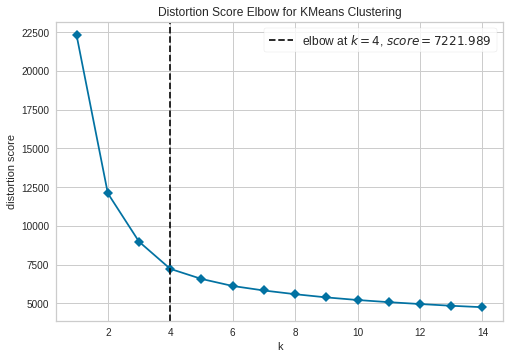

In [ ]:
kmeans_model = KMeans( random_state = 99)
visualizer = KElbowVisualizer(kmeans_model, k = (1, 15), timings = False)
visualizer.fit(X); visualizer.show();

Vamos usar outra métrica para validar o número de cluster, por meio do Silhouette score. 

In [ ]:
sillhoute_scores = []
n_cluster_list = np.arange(2, 15)

# itera nos possíveis valores de K e faz o cálculo da silhouette
for n_cluster in n_cluster_list:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))

In [ ]:
sillhoute_df = pd.DataFrame({'sillhoute_score': wcss, 'k': k_range})

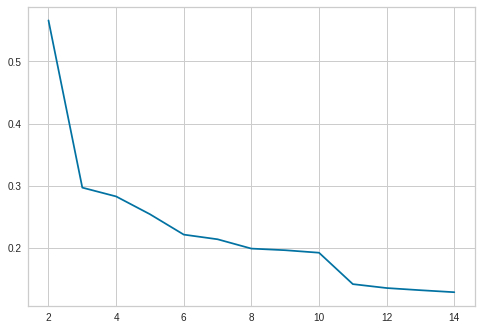

In [ ]:
plt.plot(n_cluster_list,sillhoute_scores)
plt.show()

Agora que temos uma validação para o número de clusters vamos criar uma pipeline para O KMeans.

In [29]:
data_prep = Pipeline(
    [
        ('MinMax', MinMaxScaler())
    ]
)

kmeans = Pipeline(steps = [
    ('KMeans', KMeans(n_clusters = 4,random_state = 99, init = 'k-means++'))
])


pipe = Pipeline([
    ('preprocessor', data_prep),
    ('clustering', kmeans)
])

In [30]:
from sklearn import set_config
set_config(display="diagram")
#data_prep


In [ ]:
pipe

Pipeline(steps=[('preprocessor', Pipeline(steps=[('MinMax', MinMaxScaler())])),
                ('clustering',
                 Pipeline(steps=[('KMeans',
                                  KMeans(n_clusters=4, random_state=99))]))])

In [31]:
pipe.fit(data)

Pipeline(steps=[('preprocessor', Pipeline(steps=[('MinMax', MinMaxScaler())])),
                ('clustering',
                 Pipeline(steps=[('KMeans',
                                  KMeans(n_clusters=4, random_state=99))]))])

In [32]:
pd.Series(pipe['clustering']['KMeans'].labels_)

0        3
1        3
2        3
3        1
4        2
        ..
17950    0
17951    3
17952    3
17953    3
17954    0
Length: 17955, dtype: int32

In [33]:
data['cluster'] = pipe['clustering']['KMeans'].labels_

In [34]:
df['cluster'] = pipe['clustering']['KMeans'].labels_

In [ ]:
data.head(5)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,cluster
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,3
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2


:Verifica a proporção entre os clusters:

In [35]:
(data.cluster.value_counts(normalize = True)*100).round(2)

3    32.10
2    29.51
0    27.31
1    11.08
Name: cluster, dtype: float64

In [ ]:
# features
X = data.drop(columns = 'cluster')
# target
y = data.cluster

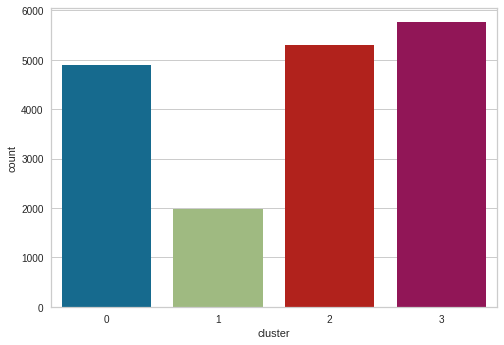

In [ ]:
sns.countplot(y);

--------------------------------------------------------------------------


In [36]:
df_teste = data.copy()

In [37]:
df_teste = df_teste.drop(columns= "cluster")

In [38]:
df_teste.head(2)

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0


In [39]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_teste), columns = df_teste.columns)

In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4,random_state = 99, init = 'k-means++')


In [41]:
# fita com a matriz X padronizada
kmeans.fit(X)

KMeans(n_clusters=4, random_state=99)

In [42]:
# rótulos obtidos pelo K-means
labels = kmeans.labels_
# centróides
centroids = kmeans.cluster_centers_

In [ ]:
# rótulos após o agrupamento
labels

array([3, 3, 3, ..., 3, 3, 0], dtype=int32)

In [43]:
np.unique(labels, axis=0)

array([0, 1, 2, 3], dtype=int32)

In [44]:
df_teste['teste'] = labels

In [45]:
df_teste.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,teste
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,3
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,3
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,3
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,1
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,2


In [46]:
df_teste.rename(columns = {'teste':'cluster'}, inplace = True)

In [47]:
# features
X = df_teste.drop(columns = 'cluster')
# target
y = df_teste.cluster

In [48]:
df_teste['cluster']

0        3
1        3
2        3
3        1
4        2
        ..
18202    0
18203    3
18204    3
18205    3
18206    0
Name: cluster, Length: 17955, dtype: int32

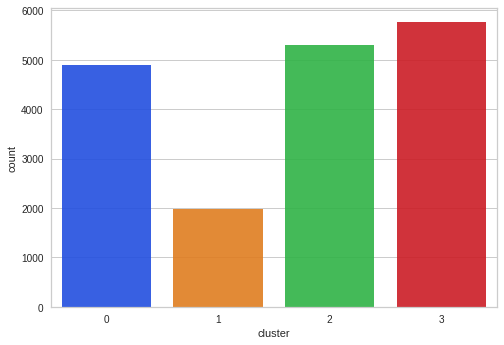

In [ ]:
#sns.FacetGrid(y)
sns.countplot(y, palette="bright",saturation=0.75,linewidth=5,x = 'Cluster',alpha=0.9,
             data=df_teste.reset_index());


O pipeline deixa o código mais fácil de entender para quem for ler. Desse modo uma boa prática pois ,em geral, o desenvolvimento de modelos são feitos em  equipe o código claro e legível facilita o trabalho de todos.

In [ ]:
# zero = df_teste.loc[df_teste['cluster'] == 0]
# um   = df_teste.loc[df_teste['cluster'] == 1]
# dois = df_teste.loc[df_teste['cluster'] == 2]
# tres = df_teste.loc[df_teste['cluster'] == 3]

In [53]:
df_teste.groupby(by = "cluster").describe()

Crossing                                                      \
           count       mean        std   min   25%   50%   75%   max   
cluster                                                                
0         4904.0  44.188825  12.835751  11.0  34.0  44.0  55.0  79.0   
1         1989.0  14.245852   3.985309   5.0  12.0  13.0  16.0  45.0   
2         5298.0  63.568328   9.473010  25.0  58.0  64.0  70.0  93.0   
3         5764.0  54.073040  12.759269  11.0  45.0  56.0  64.0  92.0   

        Finishing                                                      \
            count       mean        std   min   25%   50%   75%   max   
cluster                                                                 
0          4904.0  31.145595   9.061420  10.0  24.0  30.0  37.0  68.0   
1          1989.0  11.998994   4.004524   2.0   9.0  12.0  15.0  27.0   
2          5298.0  53.236693  11.409080  16.0  45.0  54.0  61.0  94.0   
3          5764.0  62.460271   9.085037  30.0  57.0  63.0  68.0  95.0   

        HeadingAccuracy                                                      \
                  count       mean        std   min   25%   50%   75%   max   
cluster                                                                       
0                4904.0  59.344821  10.570084  22.0  52.0  60.0  67.0  90.0   
1                1989.0  14.362494   3.942982   4.0  12.0  14.0  16.0  47.0   
2                5298.0  58.078331  10.274655  18.0  51.0  58.0  65.0  94.0   
3                5764.0  54.113636  12.894213  15.0  44.0  54.0  64.0  94.0   

        ShortPassing                                                     \
               count       mean       std   min   25%   50%   75%   max   
cluster                                                                   
0             4904.0  56.696166  9.373690  20.0  52.0  58.0  63.0  80.0   
1             1989.0  27.285571  7.860446   7.0  22.0  27.0  31.0  66.0   
2             5298.0  69.760098  6.246919  43.0  65.0  69.0  74.0  93.0   
3             5764.0  61.160305  8.639179  30.0  56.0  62.0  67.0  90.0   

        Volleys                                                     Dribbling  \
          count       mean        std   min   25%   50%   75%   max     count   
cluster                                                                         
0        4904.0  31.498777   8.020039  10.0  26.0  31.0  36.0  68.0    4904.0   
1        1989.0  12.372046   4.300735   4.0   9.0  12.0  15.0  31.0    1989.0   
2        5298.0  51.455644  12.097162  11.0  43.0  51.0  60.0  90.0    5298.0   
3        5764.0  55.390007  10.983237  18.0  47.0  55.0  63.0  90.0    5764.0   

                                           ... SlidingTackle              \
              mean        std   min   25%  ...           min   25%   50%   
cluster                                    ...                             
0        47.932708  11.514676  14.0  40.0  ...          17.0  57.0  62.0   
1        13.827049   4.298736   4.0  11.0  ...           3.0  12.0  13.0   
2        66.691770   7.413202  33.0  62.0  ...          12.0  56.0  63.0   
3        65.829632   8.389535  34.0  61.0  ...          10.0  19.0  26.0   

                    GKDiving                                               \
          75%   max    count       mean       std   min   25%   50%   75%   
cluster                                                                     
0        67.0  89.0   4904.0  10.441680  3.042741   1.0   8.0  10.0  13.0   
1        16.0  41.0   1989.0  65.318753  7.766004  45.0  60.0  65.0  70.0   
2        69.0  91.0   5298.0  10.645715  3.154986   1.0   8.0  11.0  13.0   
3        35.0  63.0   5764.0  10.415510  3.066951   1.0   8.0  10.0  13.0   

              GKHandling                                                     \
          max      count       mean       std   min   25%   50%   75%   max   
cluster                                                                       
0        32.0     4904.0  10.4798

In [54]:
df_teste.groupby(by = "cluster").describe().transpose()

cluster                     0            1            2            3
Crossing   count  4904.000000  1989.000000  5298.000000  5764.000000
           mean     44.188825    14.245852    63.568328    54.073040
           std      12.835751     3.985309     9.473010    12.759269
           min      11.000000     5.000000    25.000000    11.000000
           25%      34.000000    12.000000    58.000000    45.000000
...                       ...          ...          ...          ...
GKReflexes min       1.000000    44.000000     1.000000     1.000000
           25%       8.000000    60.000000     8.000000     8.000000
           50%      10.000000    66.000000    11.000000    10.000000
           75%      13.000000    72.000000    13.000000    13.000000
           max      34.000000    94.000000    37.000000    21.000000

[272 rows x 4 columns]

In [ ]:
df_teste.groupby(by = "cluster").median()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,44.0,30.0,60.0,58.0,31.0,50.0,35.0,33.0,53.0,55.5,63.0,63.0,58.0,58.0,61.0,47.0,68.0,65.0,71.0,33.0,63.0,61.0,39.0,43.0,40.0,55.0,61.0,64.0,62.0,10.0,10.0,10.0,10.0,10.0
1,13.0,12.0,14.0,27.0,12.0,13.0,14.0,13.0,24.0,20.0,39.0,40.0,38.0,60.0,43.0,22.0,59.0,30.0,62.0,13.0,25.0,17.0,11.0,36.0,20.0,46.0,14.0,13.0,13.0,65.0,63.0,61.0,63.0,66.0
2,64.0,54.0,58.0,69.0,51.0,66.0,61.0,56.0,66.0,69.0,69.0,69.0,70.0,67.0,70.0,67.0,69.0,75.0,68.0,61.0,69.0,65.0,61.0,64.0,55.0,66.0,63.0,66.0,63.0,11.0,11.0,11.0,11.0,11.0
3,56.0,63.0,54.0,62.0,55.0,66.0,55.0,47.0,53.0,66.0,74.0,73.0,72.0,61.0,71.0,65.0,64.0,65.0,62.0,59.0,48.0,28.0,63.0,58.0,60.0,60.0,32.0,29.0,26.0,10.0,11.0,11.0,10.0,10.0


In [ ]:
df_teste.groupby(by = "cluster").std()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.835751,9.061420,10.570084,9.373690,8.020039,11.514676,9.813209,9.005856,11.273282,8.963316,11.288956,11.187765,11.644669,7.349349,12.122114,11.646881,10.620655,9.993852,11.747849,10.889827,10.368420,8.610609,11.616680,10.231609,8.192641,9.409341,8.867860,7.822142,7.591028,3.042741,3.034038,3.130476,3.043834,3.060401
1,3.985309,4.004524,3.942982,7.860446,4.300735,4.298736,4.477588,4.691271,8.224844,5.912892,11.020042,10.756478,11.435026,10.337632,11.022685,6.922582,11.488170,7.809004,11.086598,4.344996,7.815145,6.015463,4.183202,12.717080,6.837430,12.052993,5.653603,3.414046,3.454588,7.766004,7.499315,7.636611,8.694224,8.194553
2,9.473010,11.409080,10.274655,6.246919,12.097162,7.413202,11.361263,13.126339,7.335239,6.437933,10.215589,10.550271,8.998993,7.067814,9.863411,9.299366,10.893338,9.599198,9.656787,10.823420,10.377196,9.559194,9.444443,8.978384,10.835936,8.047444,10.175183,9.119412,10.279533,3.154986,3.131349,3.161719,3.155252,3.127986
3,12.759269,9.085037,12.894213,8.639179,10.983237,8.389535,12.379094,13.792666,11.531534,7.833183,10.485944,9.972811,10.862186,9.125635,11.548909,9.166009,12.330342,10.665197,13.998720,10.172279,13.896727,10.877946,9.194684,9.425251,9.445822,9.451064,11.368110,10.601147,10.373696,3.066951,3.046300,3.114331,3.019967,3.092630


In [ ]:
df_teste.groupby(by = "cluster").mean()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,44.188825,31.145595,59.344821,56.696166,31.498777,47.932708,36.617455,34.065457,50.715131,54.122757,60.896003,61.755710,56.877651,58.523042,59.473491,46.818312,67.297104,64.709217,69.884584,34.137235,63.243271,60.693108,38.947390,42.949633,40.391517,54.574837,60.839519,63.841966,61.863785,10.441680,10.479812,10.401917,10.459421,10.421493
1,14.245852,11.998994,14.362494,27.285571,12.372046,13.827049,14.698341,14.439417,25.822524,19.945199,38.285068,38.690297,40.237808,58.889894,43.049271,22.531926,57.722976,30.445450,60.632479,12.622423,26.321770,17.028658,11.228255,37.127702,19.976370,45.118653,15.205631,14.113122,14.062846,65.318753,62.859226,61.458522,62.996983,66.087984
2,63.568328,53.236693,58.078331,69.760098,51.455644,66.691770,60.688750,55.474896,65.901850,69.156852,69.129105,68.763873,70.019441,67.270857,69.630238,66.425444,67.745376,73.986221,67.529256,60.222537,67.902605,63.981880,60.883541,63.873726,55.078331,66.183843,62.339185,65.001133,62.228388,10.645715,10.635712,10.680823,10.711778,10.656097
3,54.073040,62.460271,54.113636,61.160305,55.390007,65.829632,55.093685,48.608258,51.639833,65.509195,72.758848,72.591777,71.299618,60.635843,69.828938,64.230569,63.428001,63.399375,61.053435,58.103747,48.787994,29.164469,62.833276,58.456627,59.342124,59.878730,32.963046,29.665684,27.552741,10.415510,10.550486,10.554823,10.421756,10.451423


o agrupamento dela media dos atributos da indicios que o cluster 1
seria voltado para posiçõa defensiva.</p>
o cluster 3 da indicio que seria para possiçoes mais ofesivas.</p>
o cluster 2 da indicio de posição de meio campo voltado para o atack </p>
o cluster 1 possição de defesa saindo para o atack </p>


Para aplicação de negocio</p>
tendo um determinado sogador e sabendo qual suas abilidades fica mais </p>
fácil identificar onde o jogar podera render mais.

In [ ]:
# zero  = df_teste.query("cluster==0")
# um    = df_teste.query("cluster==1")
# dois  = df_teste.query("cluster==2")
# tres  = df_teste.query("cluster==3")

In [86]:
pca = PCA(2)
data_cluster = df_teste.copy()
data_cluster = pca.fit_transform(data_cluster)

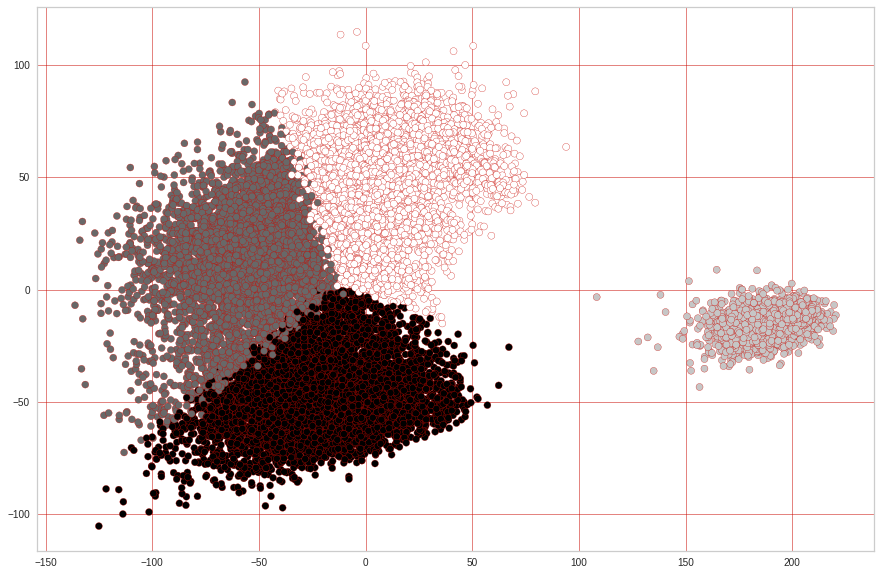

In [87]:
# mudar pallet de cor 
#edgecolor='face'
from pylab import rcParams
import matplotlib as mpl
rcParams['figure.figsize'] = 15,10
plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=df_teste.cluster, edgecolors='r');
plt.rcParams["grid.linestyle"]="dashed"
plt.grid(color='r', linewidth=0.5)


______________________________________________________

armazenar os labels nos DataFrames anteriores.

## Clustering Analysis

Proporção entre os clusters gerados:

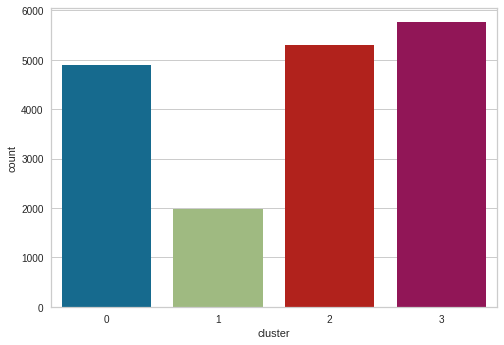

In [ ]:
sns.countplot(y);

Agora vamos aplicar um modelo de classificação para os clusters criados. Note que temos agora um problema de classificação multiclass. Antes apliquemos o feature importance para a matriz de variáveis explicativas.

### Feature importance

Aqui aplicamos o feature importance.

In [55]:
# instancia o algoritmo 
random_forest = RandomForestClassifier()
random_forest.fit(X, y)

RandomForestClassifier()

In [59]:
# fig, ax = plt.subplots(figsize=(20, 8))
# random_forest.plot_tree(random_forest);

In [57]:
# armazena os resultados em um DataFrame
importances_df = pd.DataFrame({'Features': X.columns, 
                               'Importance': random_forest.feature_importances_})
# ordena os valores
importances_df.sort_values(by = 'Importance', ascending = False, inplace = True)
# cria uma coluna com os resultados cumulativos
importances_df['Cumulative importance'] = importances_df.Importance.cumsum()
# calcula a importância relativa de cada feature
importances_df['Relative importance'] = ((importances_df.Importance/1)*100).round(2)

In [ ]:
importances_df

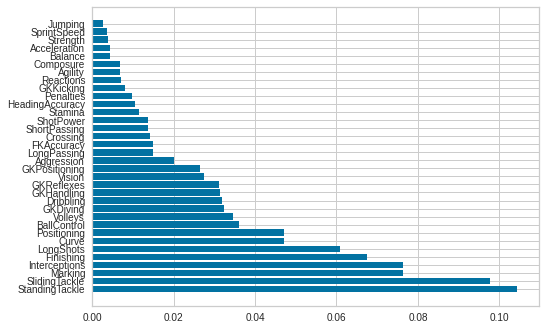

In [ ]:
plt.barh(importances_df.Features, importances_df.Importance);

In [60]:
# Função para criar pipeline com base no modelo
def create_pipe(model):
    clf = Pipeline(
        steps = [
            ('model', model)
        ]
    )
    return clf

In [61]:
# Definindo pipeline com o modelo
pipe_dt = create_pipe(DecisionTreeClassifier(max_depth=5))

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X,y)

In [117]:
from sklearn import tree
# # figsize=(20, 15)
# fig, ax = plt.subplots()
# rcParams['figure.figsize'] = 25,20
# #plt.savefig("High resoltion.png",dpi=300)
# tree.plot_tree(tree_clf,filled=True);

In [ ]:
text_representation = tree.export_text(tree_clf)
print(text_representation)

https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py</p>
olhar depois com tempo para ver como plotar 


https://mljar.com/blog/visualize-decision-tree/

In [ ]:
!pip install dtreeviz  

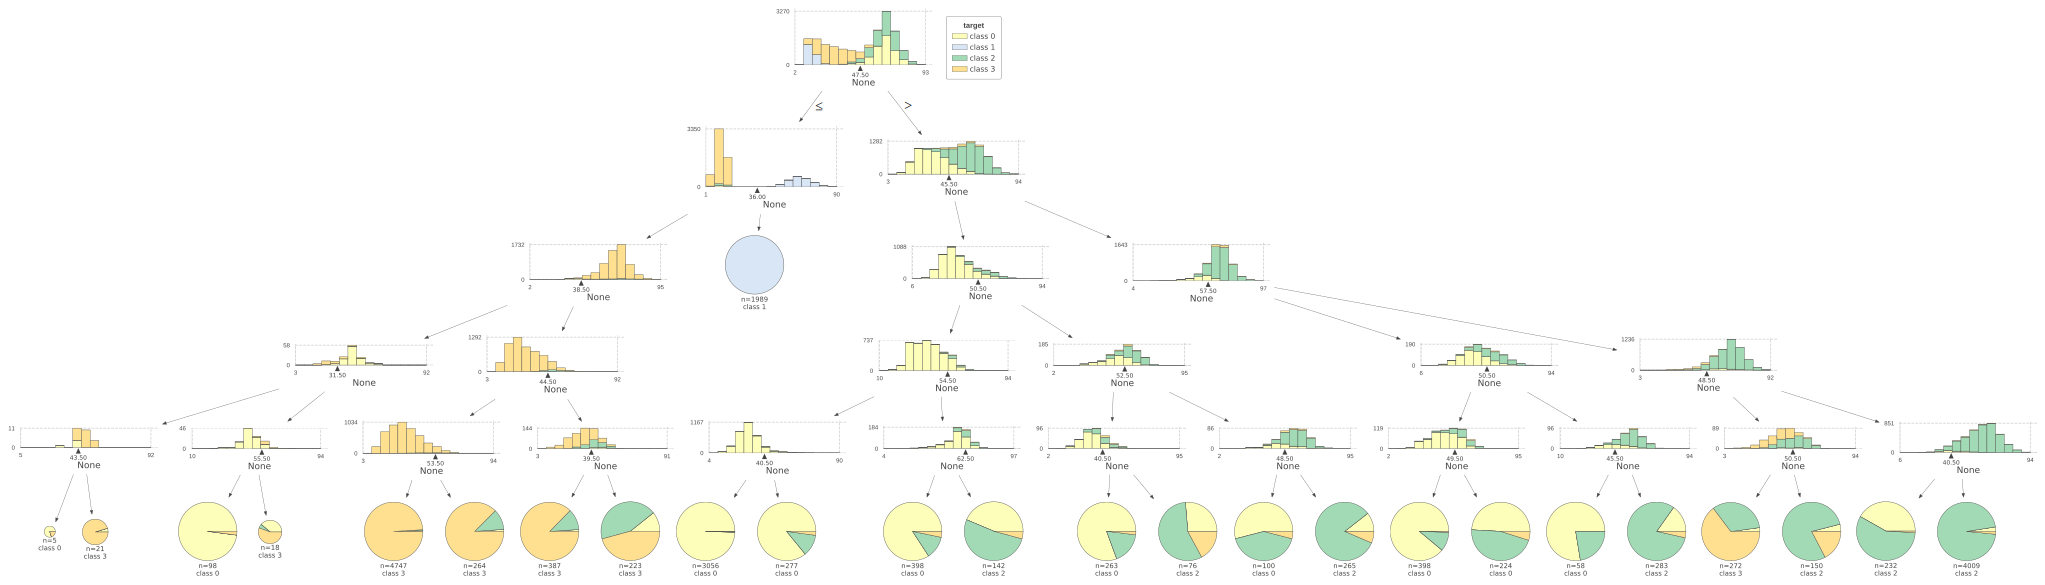

In [116]:
#import dtreeviz
from dtreeviz.trees import dtreeviz # remember to load the package !pip install dtreeviz  

viz = dtreeviz(tree_clf, X, y,
                target_name="target",
                )
viz

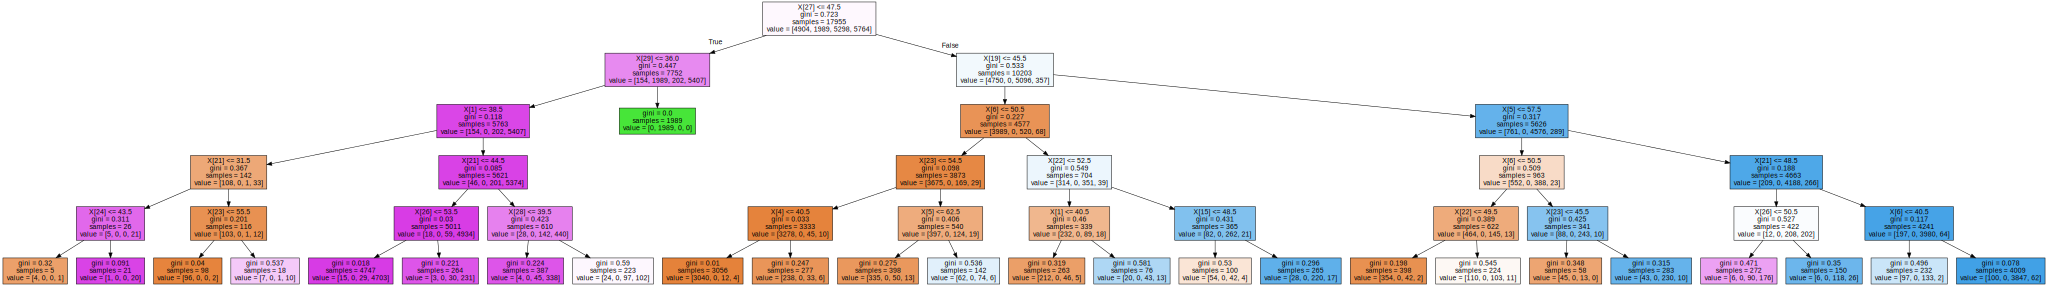

In [102]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, filled=True)
graphviz.Source(dot_data, format="png") 

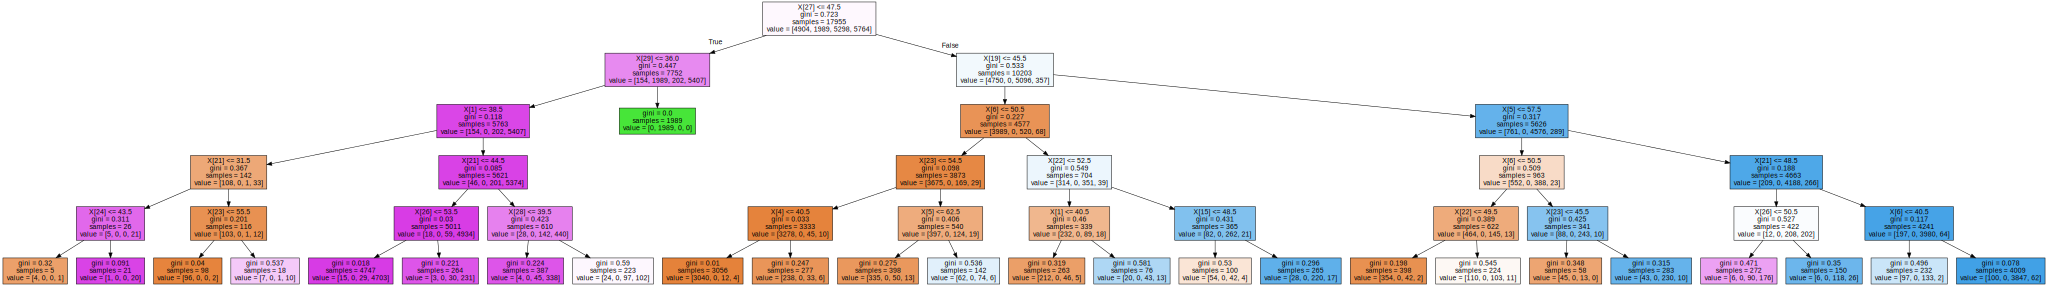

In [100]:
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None,filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
pipe_dt 

Pipeline(steps=[('model', DecisionTreeClassifier(max_depth=5))])

In [62]:
SEED = 99
cv_skf = StratifiedKFold(shuffle=True, random_state = SEED)

In [ ]:
# Fazendo validação cruzada
cv_scores_dt = cross_validate(
    estimator=pipe_dt,
    X = X,
    y= y,
    scoring='accuracy',
    cv=cv_skf,
    return_train_score=True
)

In [ ]:
# acurácia média nos dados de treino
cv_scores_dt['train_score'].mean()

0.9342244500139237

In [ ]:
# acurácia média nos dados de teste
cv_scores_dt['test_score'].mean()

0.9265942634363687

Métricas de treino e teste bem próximas, o que indica que não há overfitting.

Vamos fazer o hypertunning da nossa árvore. Sabemos que:

* criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
* max_depth: The maximum depth of the tree.
* min_samples_leaf: The minimum number of samples required to be at a leaf node.
* min_samples_split: The minimum number of samples required to split an internal node.

In [ ]:
param_grid_dt = {
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth' : range(1, 11),
    'model__min_samples_leaf' : range(2, 21, 2),
    'model__min_samples_split' : range(2, 41, 5),
}

random_search_dt = RandomizedSearchCV(
    estimator=pipe_dt,
    param_distributions=param_grid_dt,
    scoring='accuracy',
    random_state=123,
    n_jobs=-1,
    verbose=1,
    n_iter=1000
)

random_search_dt.fit(X, y);

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [ ]:
print(f'Melhor Score do Decision Tree: {random_search_dt.best_score_:.4f}')

Melhor Score do Decision Tree: 0.9181


In [ ]:
best_dt = random_search_dt.best_estimator_

In [ ]:
best_params = random_search_dt.best_params_

In [ ]:
best_params

{'model__criterion': 'entropy',
 'model__max_depth': 9,
 'model__min_samples_leaf': 6,
 'model__min_samples_split': 12}

Agora vamos treinar e avaliar o modelo com os hiperparâmetros escolhidos pelo RandomizedSearch.

In [ ]:
SEED = 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

In [ ]:
# treina o modelo de árvore com os melhores hiperparâmetros obtidos
clf_tree = DecisionTreeClassifier(
    criterion = best_params['model__criterion'],
    max_depth = best_params['model__max_depth'],
    min_samples_split = best_params['model__min_samples_split'],
    min_samples_leaf = best_params['model__min_samples_leaf']
)

In [ ]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=6,
                       min_samples_split=12)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 8))
clf_tree.plot_tree(tree_clf);

In [ ]:
# calcula o y pred
y_pred = clf_tree.predict(X_test)

In [ ]:
# acurácia
accuracy_score(y_test, y_pred)

0.9400408390569891

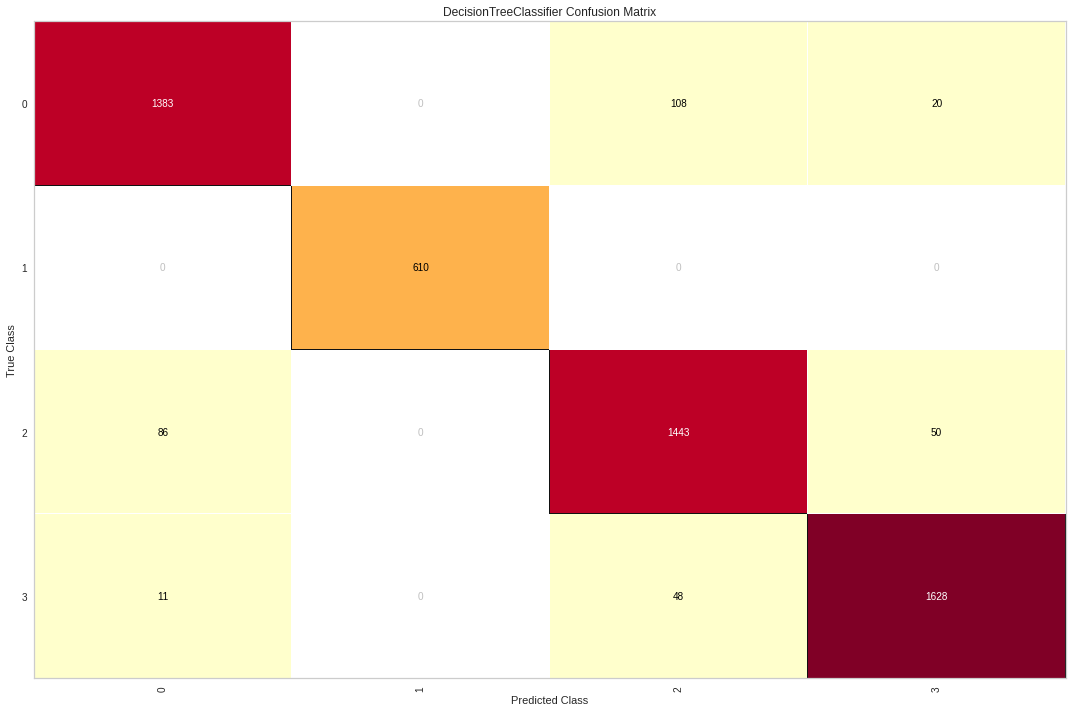

In [ ]:
# mostra a matriz de confusão com o yellowbrick
confusion_matrix = ConfusionMatrix(clf_tree)
confusion_matrix.fit(X_train, y_train);confusion_matrix.score(X_test, y_test);confusion_matrix.show();

In [ ]:
# mostra as métricas gerais
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1511
           1       1.00      1.00      1.00       610
           2       0.90      0.91      0.91      1579
           3       0.96      0.97      0.96      1687

    accuracy                           0.94      5387
   macro avg       0.95      0.95      0.95      5387
weighted avg       0.94      0.94      0.94      5387

